## Azure notebook Setup

In [1]:
#A class attribute that provides access to the TabularDatasetFactory methods for creating new TabularDataset objects. 
#Usage: Dataset.Tabular.from_delimited_files().
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b' #check the launch studio there will get this id
resource_group = 'VChamp-Team3' # resource group name
workspace_name = 'vchamp-team3' # worksapce name


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.
#Constructor
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_train']
datastore = workspace.datastores['data_team3_synthetic_train']

In [3]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'measurements_blood_pressure_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
measurements_blood_pressure_train_data= dataset.to_pandas_dataframe()

In [5]:
type(measurements_blood_pressure_train_data)

pandas.core.frame.DataFrame

In [6]:
measurements_blood_pressure_train_data.head()

,Column1,Internalpatientid,Age at measurement bp,Measurement date,Diastolic bp,Systolic bp,State
0,0,1,61.554040,2005-10-25 00:02:08,75.0,140.0,Indiana
1,1,1,67.037260,2011-04-21 02:50:27,72.0,116.0,Indiana
2,2,1,68.304140,2012-07-27 03:54:47,100.0,145.0,Indiana
3,3,1,68.347339,2012-08-11 22:51:23,89.0,155.0,Indiana
4,4,1,68.781623,2013-01-17 16:23:39,72.0,143.0,Indiana


----
# Measurements Blood Pressure Train
----

## **Dataset Description:**

- **Internalpatientid:** The unique identifier for each patient in the dataset.
- **Age at measurement bp:** The age of the patient at the time the blood pressure measurement was taken.
- **Measurement date:** The date and time when the blood pressure measurement was taken.
- **Diastolic bp:** The diastolic blood pressure value, which represents the pressure in the arteries when the heart is at rest between beats.
- **Systolic bp:** The systolic blood pressure value, which represents the pressure in the arteries when the heart is actively pumping blood.
- **State:** The state where the measurement was taken or the patient's residence.


**For Understanding**

**Diastolic blood pressure (Diastolic BP)** is the bottom number in a blood pressure reading, and **it represents the pressure in your arteries when your heart is at rest between beats.** It indicates the pressure on your blood vessels when the heart is relaxed and filling with blood.

**Systolic blood pressure (Systolic BP)** is the top number in a blood pressure reading, and **it represents the pressure in your arteries when your heart is actively pumping blood.** It indicates the pressure on your blood vessels when the heart contracts and pushes blood out into the arteries.

For a healthy adult, a stable blood pressure is typically considered to be around **120/80** mmHg (millimeters of mercury) or lower. The **systolic blood pressure should be below 120 mmHg,** and **the diastolic blood pressure should be below 80 mmHg.** However, it's important to note that optimal blood pressure values can vary depending on factors such as age, overall health, and any existing medical conditions

---
## **Content:**
   - 1. Importing Libraries
   - 2. Data Exploration
   - 3. Checking for Missing Values
   - 4. Exploring Numerical Variables
   - 5. Exploring Object-Type Features
   - 6. Age-Based Bucketing for Measurements Blood Pressure Aggregation and Grouping
        - Checking Missing Values for Grouped columns
   - 7. Loading the Death file
        - Merging Measurements Blood Pressure Grouped Columns and Death File with Left join on using Internalpatientid
        - Checking Missing Values for Death patients
   - 8. Bivariate Analysis for Each Column vs. Death   
   - 9. Observations
   
---

## 1. Importing Libraries

In [7]:
# Importing essential libraries
import pandas as pd        # Library for data manipulation and analysis
import numpy as np         # Library for mathematical operations
import matplotlib.pyplot as plt     # Library for data visualization
import seaborn as sns      # Library for advanced data visualization

## 2. Data Exploration

In [8]:
# changing variable name for dataframe
df = measurements_blood_pressure_train_data

In [9]:
# Display the first few rows of a DataFrame
df.head()

,Column1,Internalpatientid,Age at measurement bp,Measurement date,Diastolic bp,Systolic bp,State
0,0,1,61.554040,2005-10-25 00:02:08,75.0,140.0,Indiana
1,1,1,67.037260,2011-04-21 02:50:27,72.0,116.0,Indiana
2,2,1,68.304140,2012-07-27 03:54:47,100.0,145.0,Indiana
3,3,1,68.347339,2012-08-11 22:51:23,89.0,155.0,Indiana
4,4,1,68.781623,2013-01-17 16:23:39,72.0,143.0,Indiana


In [10]:
# Shape of the dataset
df.shape

num_rows = df.shape[0]  # Number of rows
num_cols = df.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 21997558
Number of columns: 7


In [11]:
# Get the number of unique values in the 'Internalpatientid' column
df['Internalpatientid'].nunique()

132210

In [12]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997558 entries, 0 to 21997557
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Column1                int64         
 1   Internalpatientid      int64         
 2   Age at measurement bp  float64       
 3   Measurement date       datetime64[ns]
 4   Diastolic bp           float64       
 5   Systolic bp            float64       
 6   State                  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.1+ GB


- The 'Internalpatientid' column contains integer values, and the columns for 'Age at measurement bp', 'Diastolic bp' and 'Systolic bp' are in float format, while the rest of the features are in object format.

## 3. Checking Missing Values

In [13]:
# List comprehension to find columns with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [14]:
# Count the number of missing values in each column
df.isnull().sum()

Column1                  0
Internalpatientid        0
Age at measurement bp    0
Measurement date         0
Diastolic bp             0
Systolic bp              0
State                    0
dtype: int64

- There is no missing value in this file.

## 4. Exploring Numerical Variables

### Age at measurement bp

In [18]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Column1,Internalpatientid,Age at measurement bp,Diastolic bp,Systolic bp
count,2.199756e+07,2.199756e+07,2.199756e+07,2.199756e+07,2.199756e+07
mean,1.405536e+07,8.521049e+04,6.985894e+01,7.260799e+01,1.318807e+02
std,8.113109e+06,4.880468e+04,1.144993e+01,1.320071e+01,2.268283e+01
min,0.000000e+00,1.000000e+00,1.332099e+01,2.900000e+01,4.000000e+01
25%,7.034867e+06,4.287000e+04,6.195244e+01,6.400000e+01,1.160000e+02
50%,1.407639e+07,8.590000e+04,6.972017e+01,7.200000e+01,1.310000e+02
75%,2.108578e+07,1.273410e+05,7.809560e+01,8.100000e+01,1.460000e+02
max,2.810855e+07,1.690640e+05,1.099724e+02,2.080000e+02,3.120000e+02


In [19]:
# Calculate descriptive statistics for the dataframe
description = df.describe()
min_age = description.loc['min', 'Age at measurement bp']  # Extract the minimum age value
max_age = description.loc['max', 'Age at measurement bp']  # Extract the maximum age value
mean = description.loc['mean', 'Age at measurement bp']  # Extract the mean age value
count = description.loc['count', 'Age at measurement bp']  # Extract the count of age values

print("Age at measurement bp:") 
print("Mean age: {:.2f}".format(mean))  # Print the mean age formatted with two decimal places
print("Minimum Age: {:.2f}".format(min_age))  # Print the minimum age formatted with two decimal places
print("Maximum Age: {:.2f}".format(max_age))  # Print the maximum age formatted with two decimal places
print("Count:", count)  

Age at measurement bp:
Mean age: 69.86
Minimum Age: 13.32
Maximum Age: 109.97
Count: 21997558.0


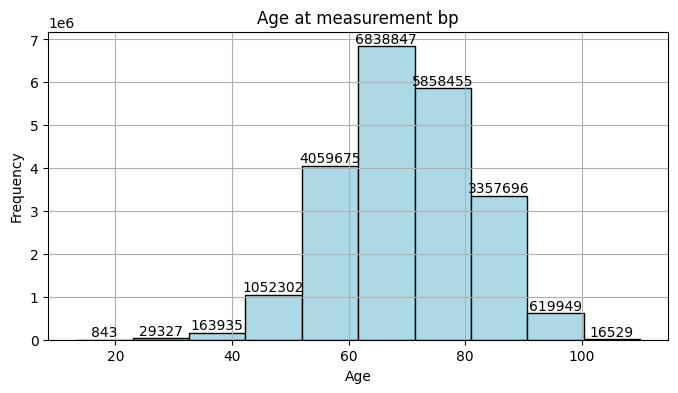

In [20]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at measurement bp']

# Create a histogram
plt.figure(figsize=(8, 4))
hist = plt.hist(age, bins=10, edgecolor='black', color='lightblue')  # Adjust the number of bins as needed

# Add x-bar values to each bar with adjusted spacing
for i in range(len(hist[0])):
    plt.text(hist[1][i] + (hist[1][i+1] - hist[1][i])/2, hist[0][i] + 10, str(int(hist[0][i])), ha='center', va='bottom', color='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age at measurement bp')
plt.grid(True)  # Add grid lines
plt.show()

- The **mean age** at the time of blood pressure measurement is approximately **70 years**..
- The **minimum age is 20 years**, suggesting that there are relatively younger individuals included in the dataset.
- The **maximum age is 106 years,** indicating that the dataset also includes measurements from older individuals.

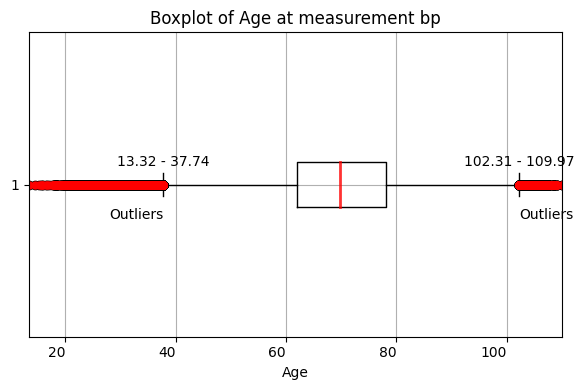

In [21]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at measurement bp']

# Calculate outliers
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(age, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Age')
plt.title('Boxplot of Age at measurement bp')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(age), max(age)])
plt.xticks(ha='right')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(age):.2f} - {lower_bound:.2f}', ha='center', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(age):.2f}', ha='center', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

**Outlier Ages:** There are two ranges of outlier ages in the dataset. One range is between 20 and 40, and the other range is between 100 and 107.

### Diastolic bp

In [22]:
description = df.describe()
min_diastolic_bp = description.loc['min', 'Diastolic bp'] # Extract the minimum diastolic bp value
max_diastolic_bp = description.loc['max', 'Diastolic bp'] # Extract the maximum diastolic bp value
mean_diastolic_bp = description.loc['mean', 'Diastolic bp'] # Extract the mean diastolic bp value
count_diastolic_bp = description.loc['count', 'Diastolic bp'] # Extract the count of diastolic bp values

print("Diastolic bp:")
print("Mean diastolic bp: {:.2f}".format(mean_diastolic_bp)) 
print("Minimum diastolic bp: {:.2f}".format(min_diastolic_bp)) 
print("Maximum diastolic bp: {:.2f}".format(max_diastolic_bp))
print("Count:", count_diastolic_bp)

Diastolic bp:
Mean diastolic bp: 72.61
Minimum diastolic bp: 29.00
Maximum diastolic bp: 208.00
Count: 21997558.0


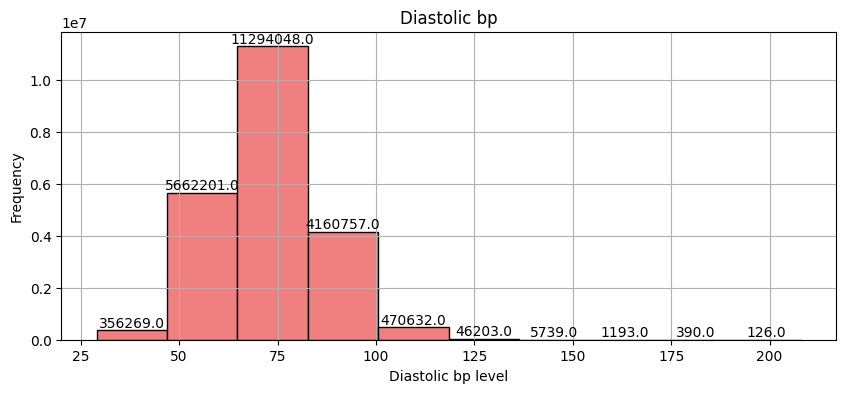

In [23]:
# Create a histogram for Diastolic Blood Pressure (bp)
d_bp = df['Diastolic bp']

plt.figure(figsize=(10, 4))
plt.hist(d_bp, bins=10, edgecolor='black', color='lightcoral')  # Adjust the number of bins as needed
plt.xlabel('Diastolic bp level')
plt.ylabel('Frequency')
plt.title('Diastolic bp')
plt.grid(True)  # Add grid lines

# Add count on top of each bar
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

**Diastolic bp:**

 - The majority of patients have a diastolic blood pressure (bp) level between 65 and 75. 
 - The **mean diastolic blood pressure** is approximately **73 mmHg.** In the real world, a normal diastolic blood pressure is generally considered to be below 80 mmHg.
 - The **minimum diastolic blood** pressure in the dataset is **30 mmHg,** which is lower than the usual range. It's important to note that such a low value may be an anomaly or an indication of a health condition and should be further investigated.
 - The **maximum diastolic blood pressure is 203 mmHg**, which is significantly higher than the normal range. High diastolic blood pressure can be a sign of hypertension or other underlying health issues.

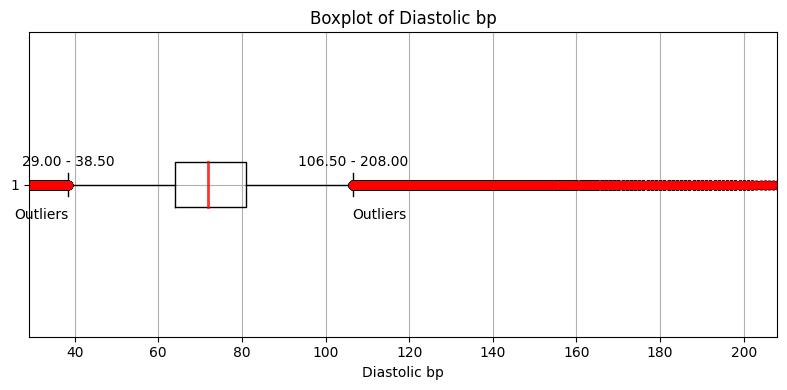

In [24]:
# Calculate outliers
diastolic_bp = df['Diastolic bp']
q1 = np.percentile(diastolic_bp, 25)
q3 = np.percentile(diastolic_bp, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = diastolic_bp[(diastolic_bp < lower_bound) | (diastolic_bp > upper_bound)]

# Create a boxplot
plt.figure(figsize=(8, 4))
boxplot = plt.boxplot(diastolic_bp, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Diastolic bp')
plt.title('Boxplot of Diastolic bp')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(diastolic_bp), max(diastolic_bp)])
plt.xticks(ha='center')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(diastolic_bp):.2f} - {lower_bound:.2f}', ha='center', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(diastolic_bp):.2f}', ha='center', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

- There are outliers for diastolic blood pressure in the ranges of 30 to 39 and 107 to 203, indicating potentially dangerous health issues.

### Systolic bp

In [25]:
description = df.describe()
min_systolic_bp = description.loc['min', 'Systolic bp'] # Extract the minimum systolic bp value
max_systolic_bp = description.loc['max', 'Systolic bp'] # Extract the maximum systolic bp value
mean_systolic_bp = description.loc['mean', 'Systolic bp'] # Extract the mean systolic bp value
count_systolic_bp = description.loc['count', 'Systolic bp'] # Extract the count of systolic bp values

print("Systolic bp:")
print("Mean systolic bp: {:.2f}".format(mean_systolic_bp))
print("Minimum systolic bp: {:.2f}".format(min_systolic_bp))
print("Maximum systolic bp: {:.2f}".format(max_systolic_bp)) 
print("Count:", count_systolic_bp)

Systolic bp:
Mean systolic bp: 131.88
Minimum systolic bp: 40.00
Maximum systolic bp: 312.00
Count: 21997558.0


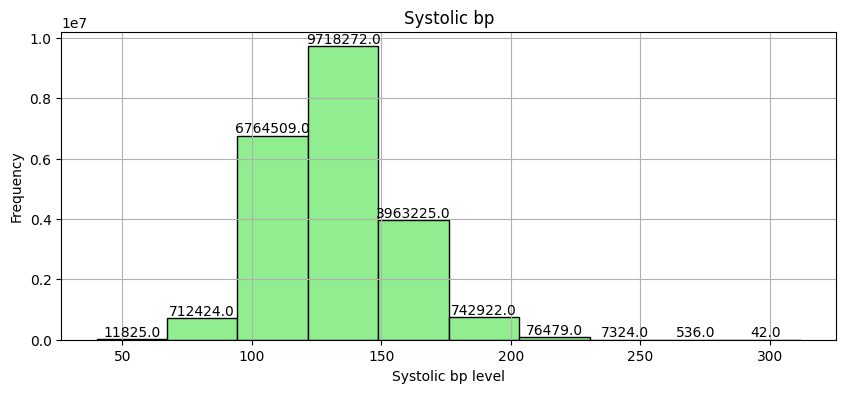

In [26]:
# Create a histogram for Systolic Blood Pressure (bp)
s_bp = df['Systolic bp']

plt.figure(figsize=(10, 4))
plt.hist(s_bp, bins=10, edgecolor='black', color='lightgreen')  # Adjust the number of bins as needed
plt.xlabel('Systolic bp level')
plt.ylabel('Frequency')
plt.title('Systolic bp')
plt.grid(True)  # Add grid lines

# Add count on top of each bar
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

 - The majority of patients have a systolic blood pressure (bp) level between 65 and 80. 
 - The **mean systolic blood pressure** is approximately **131 mmHg**. In the real world, a normal systolic blood pressure is generally considered to be below 120 mmHg.
  - The **minimum systolic blood pressure** in the dataset is **43 mmHg**, which is lower than the usual range. Similarly to the diastolic blood pressure, such a low value may require further investigation.
  - The **maximum systolic blood pressure is 296 mmHg,** which is significantly higher than the normal range. High systolic blood pressure is an important indicator of hypertension and can pose health risks.

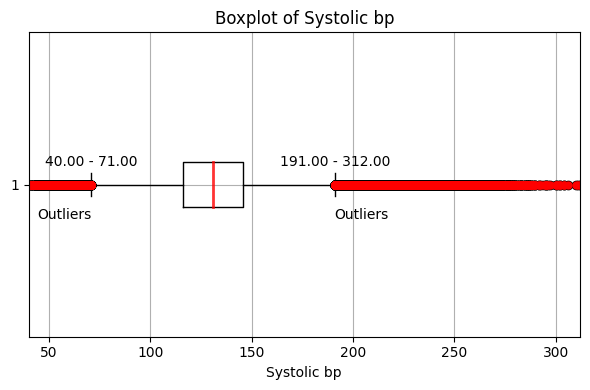

In [27]:
# Calculate outliers
systolic_bp = df['Systolic bp']
q1 = np.percentile(systolic_bp, 25)
q3 = np.percentile(systolic_bp, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = systolic_bp[(systolic_bp < lower_bound) | (systolic_bp > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(systolic_bp, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Systolic bp')
plt.title('Boxplot of Systolic bp')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(systolic_bp), max(systolic_bp)])
plt.xticks(ha='center')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(systolic_bp):.2f} - {lower_bound:.2f}', ha='center', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(systolic_bp):.2f}', ha='center', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

- There are outliers for systolic blood pressure in the ranges of 43 to 71 and 191 to 293, indicating potentially dangerous health issues.

### Internalpatientid

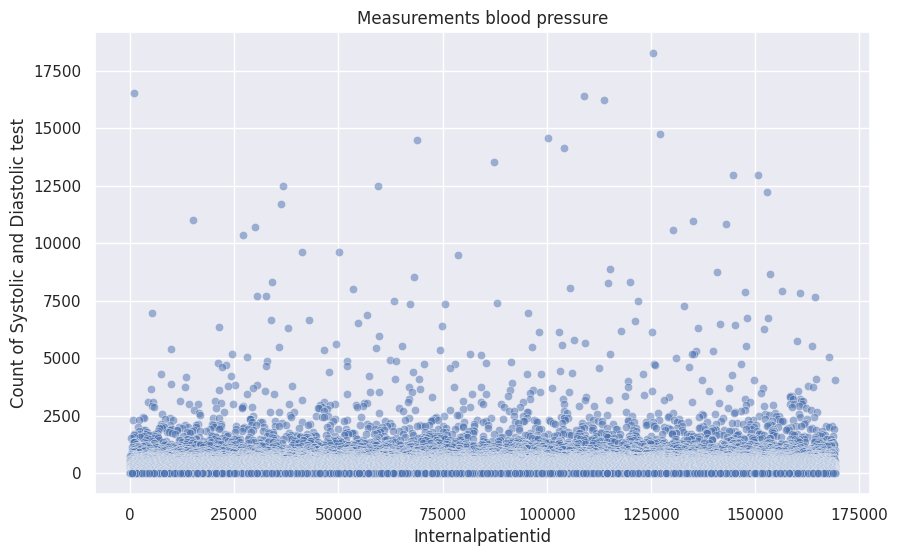

In [34]:
# Assuming 'df' is your DataFrame
sns.set(style="darkgrid")
# Count occurrences of each 'Internalpatientid'
patientid_counts = df['Internalpatientid'].value_counts().reset_index()
patientid_counts.columns = ['Internalpatientid', 'Count']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Internalpatientid', y='Count', data=patientid_counts, alpha=0.5)
plt.xlabel('Internalpatientid')
plt.ylabel('Count of Systolic and Diastolic test')
plt.title('Measurements blood pressure')

plt.grid(True)
plt.show()

---

## 5. Exploring Object-Type Features

### State

In [25]:
df.describe(include=['object'])

,State
count,21997558
unique,51
top,Texas
freq,1882958


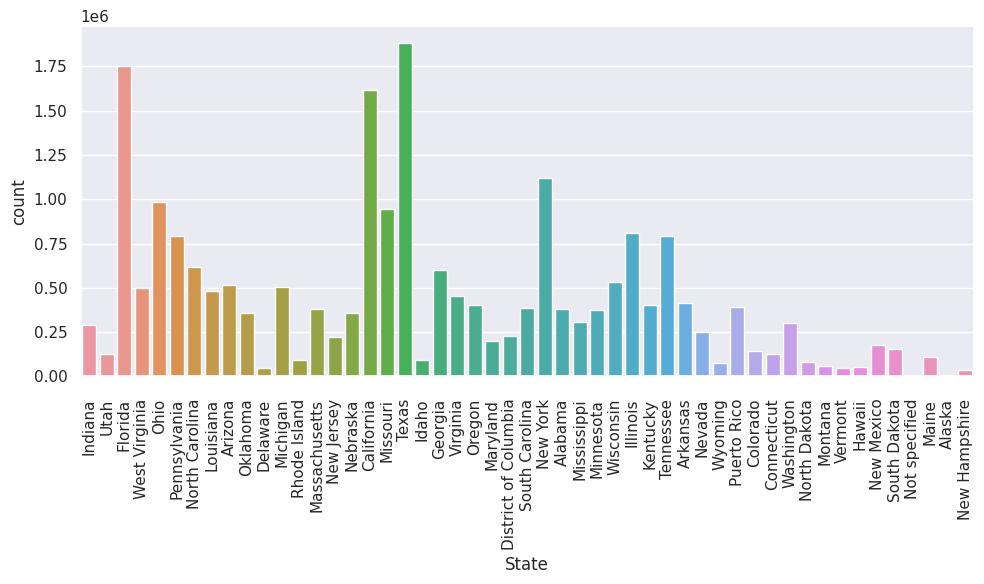

In [26]:
# Increase the figure size
plt.figure(figsize=(10, 6))

sns.set(style="darkgrid")
ax = sns.countplot(x='State', data=df)

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust spacing
ax.tick_params(axis='x', which='major', pad=10)

plt.tight_layout()
plt.show()

- There are a total of 1048575 measurements recorded. These measurements are distributed across 50 unique states. 
- Among all the states, Texas has the highest frequency, appearing 98710 times in the dataset.

## Analyze the relationship between the features

### Age at measurement bp vs Diastolic bp and Age at measurement bp vs Systolic bp

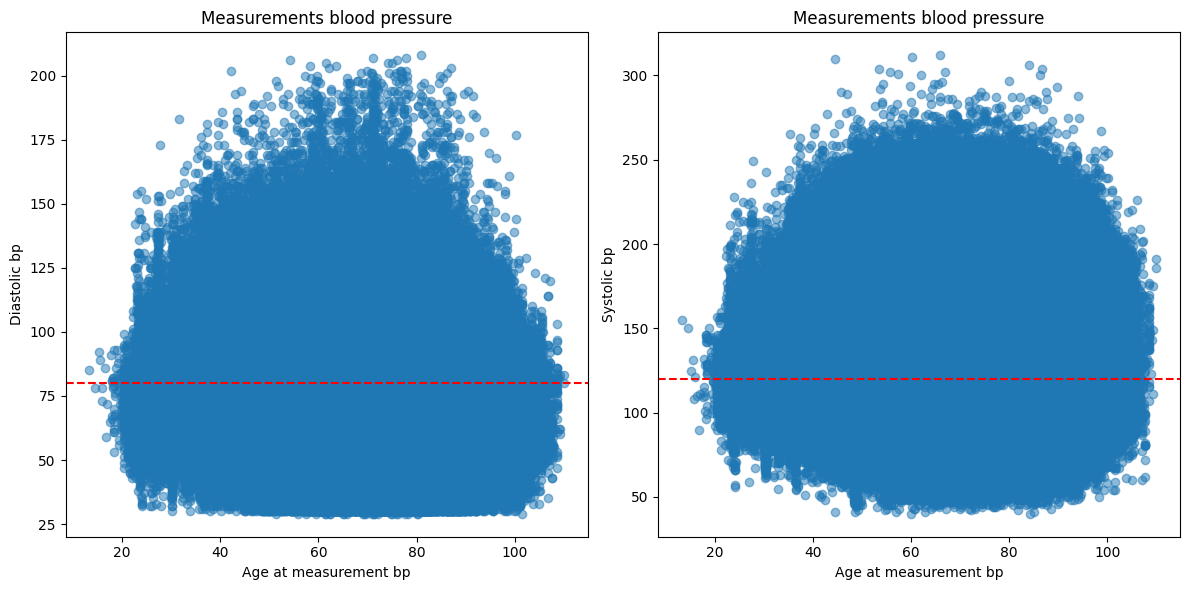

In [29]:
# Create scatter plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot: Age vs. Diastolic bp
axs[0].scatter(age, diastolic_bp, alpha=0.5)
axs[0].axhline(y=80, color='red', linestyle='--')  # Add horizontal line at Diastolic bp = 80
axs[0].set_xlabel('Age at measurement bp')
axs[0].set_ylabel('Diastolic bp')
axs[0].set_title('Measurements blood pressure')

# Scatter plot: Age vs. Systolic bp
axs[1].scatter(age, systolic_bp, alpha=0.5)
axs[1].axhline(y=120, color='red', linestyle='--')  # Add horizontal line at Systolic bp = 120
axs[1].set_xlabel('Age at measurement bp')
axs[1].set_ylabel('Systolic bp')
axs[1].set_title('Measurements blood pressure')

plt.tight_layout()
plt.show()


**Age at measurement bp vs Systolic bp**

- There is a wide range of Systolic bp values across different age groups. The Systolic bp values vary considerably for similar Age at measurement bp values, indicating that factors other than age may contribute to variations in Systolic bp.
- The number of patients in the age range of 20 to 40 is relatively lower compared to other age ranges in the dataset.

#### Age at measurement bp vs Diastolic bp

- There appears to be a wide range of Diastolic bp values across different age groups. The Diastolic bp values vary for similar Age at measurement bp values, indicating that factors other than age may influence Diastolic bp.

- There are some outliers in the data, particularly in the higher Diastolic bp range at the age 60-90. These outliers represent individuals with significantly higher Diastolic bp compared to the majority of the data points.


### Diastolic BP Below 80 and above 80

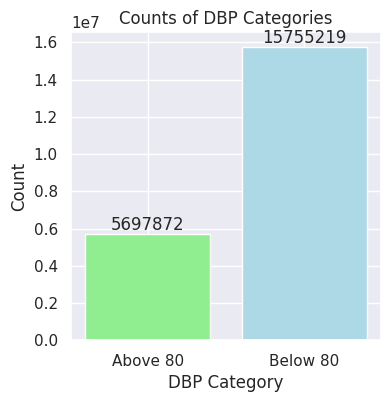

In [28]:
# Calculate the counts of individuals above and below 80 DBP
count_above_80 = df[df['Diastolic bp'] > 80].shape[0]
count_below_80 = df[df['Diastolic bp'] < 80].shape[0]

# Create a bar chart
categories = ['Above 80', 'Below 80']
counts = [count_above_80, count_below_80]
colors = ['lightgreen', 'lightblue']

# Set the figure size
plt.figure(figsize=(4, 4))

plt.bar(categories, counts, color=colors)
plt.xlabel('DBP Category')
plt.ylabel('Count')
plt.title('Counts of DBP Categories')

# Add count values on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [29]:
print("Diastolic BP Below 80 and above 80")
print("Count above 80: ", count_above_80)
print("Count below 80: ", count_below_80)

Diastolic BP Below 80 and above 80
Count above 80:  5697872
Count below 80:  15755219


### Systolic BP Below 120 and above 120

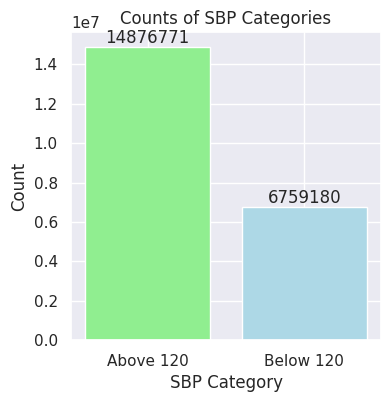

In [30]:
# Calculate the counts of individuals above and below 80 SBP
count_above_120 = df[df['Systolic bp'] > 120].shape[0]
count_below_120 = df[df['Systolic bp'] < 120].shape[0]

# Create a bar chart
categories = ['Above 120', 'Below 120']
counts = [count_above_120, count_below_120]
colors = ['lightgreen', 'lightblue']

# Set the figure size
plt.figure(figsize=(4, 4))

plt.bar(categories, counts, color=colors)
plt.xlabel('SBP Category')
plt.ylabel('Count')
plt.title('Counts of SBP Categories')

# Add count values on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [31]:
print("Systolic BP Below 120 and above 120")
print("Count above 120: ", count_above_120)
print("Count below 120: ", count_below_120)

Systolic BP Below 120 and above 120
Count above 120:  14876771
Count below 120:  6759180


### Diastolic BP = 80 and Systolic BP = 120

In [32]:
# Filter the DataFrame based on SBP and DBP conditions
filtered_df = df[(df['Systolic bp'] == 120) & (df['Diastolic bp'] == 80)]

In [33]:
filtered_df

,Column1,Internalpatientid,Age at measurement bp,Measurement date,Diastolic bp,Systolic bp,State
527,628,10006,67.781711,2004-06-10 05:10:18,80.0,120.0,Mississippi
9362,12054,100312,73.758988,2021-08-01 21:50:37,80.0,120.0,Florida
12118,15363,100172,69.127750,2014-09-26 04:37:38,80.0,120.0,Kentucky
18591,23399,100166,58.816204,2012-07-29 07:44:25,80.0,120.0,California
23037,28698,100639,59.034569,2009-12-15 03:14:13,80.0,120.0,Georgia
...,...,...,...,...,...,...,...
21986883,28094651,99786,71.630916,2017-08-28 02:23:57,80.0,120.0,Georgia
21986936,28094756,98815,59.923054,2005-12-30 21:01:52,80.0,120.0,Missouri
21990872,28099901,99073,68.590092,2018-05-21 16:17:03,80.0,120.0,Arkansas
21994928,28105039,99580,60.771641,1999-12-14 00:49:57,80.0,120.0,Ohio


In [34]:
# Count the number of instances
count = filtered_df.shape[0]

In [35]:
categories = ['SBP=120, DBP=80']
counts = [count]
print("Systolic BP Below 120 and above 120:", count)

Systolic BP Below 120 and above 120: 8565


---

## 6. Age-Based Bucketing for Blood Pressure Aggregation and Grouping

In [23]:
df

,Column1,Internalpatientid,Age at measurement bp,Measurement date,Diastolic bp,Systolic bp,State
0,0,1,61.554040,2005-10-25 00:02:08,75.0,140.0,Indiana
1,1,1,67.037260,2011-04-21 02:50:27,72.0,116.0,Indiana
2,2,1,68.304140,2012-07-27 03:54:47,100.0,145.0,Indiana
3,3,1,68.347339,2012-08-11 22:51:23,89.0,155.0,Indiana
4,4,1,68.781623,2013-01-17 16:23:39,72.0,143.0,Indiana
...,...,...,...,...,...,...,...
21997553,28108545,99999,96.324828,2013-03-28 17:23:42,62.0,147.0,Arizona
21997554,28108546,99999,96.326070,2013-03-29 04:17:14,57.0,123.0,Arizona
21997555,28108547,99999,96.331619,2013-03-31 04:57:36,68.0,154.0,Arizona
21997556,28108548,99999,96.357136,2013-04-09 12:47:57,79.0,147.0,Arizona


In [24]:
# Drop the specified columns from the DataFrame
df.drop(['Measurement date','State'], axis=1,inplace=True)

In [25]:
# Drop the specified columns from the DataFrame
df.drop(['Column1'], axis=1,inplace=True)

In [26]:
# changing variable name for dataframe
measurement_blood_pressure = df

In [27]:
measurement_blood_pressure.head()

,Internalpatientid,Age at measurement bp,Diastolic bp,Systolic bp
0,1,61.554040,75.0,140.0
1,1,67.037260,72.0,116.0
2,1,68.304140,100.0,145.0
3,1,68.347339,89.0,155.0
4,1,68.781623,72.0,143.0


In [28]:
measurement_blood_pressure.describe()

,Internalpatientid,Age at measurement bp,Diastolic bp,Systolic bp
count,2.199756e+07,2.199756e+07,2.199756e+07,2.199756e+07
mean,8.521049e+04,6.985894e+01,7.260799e+01,1.318807e+02
std,4.880468e+04,1.144993e+01,1.320071e+01,2.268283e+01
min,1.000000e+00,1.332099e+01,2.900000e+01,4.000000e+01
25%,4.287000e+04,6.195244e+01,6.400000e+01,1.160000e+02
50%,8.590000e+04,6.972017e+01,7.200000e+01,1.310000e+02
75%,1.273410e+05,7.809560e+01,8.100000e+01,1.460000e+02
max,1.690640e+05,1.099724e+02,2.080000e+02,3.120000e+02


### Convert 'Systolic bp' and 'Diastolic bp' columns to string type

In [29]:
# Define the age ranges
age_ranges = [(13.0, 29.9),(30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9),(70.0, 79.9), (80.0, 89.9), (90.0, 99.9), (100.0, 110)] 
# Convert 'Systolic bp' and 'Diastolic bp' columns to string type
measurement_blood_pressure['Systolic bp'] = measurement_blood_pressure['Systolic bp'].astype(str)
measurement_blood_pressure['Diastolic bp'] = measurement_blood_pressure['Diastolic bp'].astype(str)

# Create the new columns based on age ranges
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_Diastolic bp'
    second_range_label = f'{range_start}-{range_end}_Systolic bp'
    # Assign Diastolic bp values for each age range
    measurement_blood_pressure[range_label] = measurement_blood_pressure.apply(
        lambda row: str(row['Diastolic bp']) if range_start <= row['Age at measurement bp'] <= range_end else None,
        axis=1
    )
    # Assign Systolic bp values for each age range
    measurement_blood_pressure[second_range_label] = measurement_blood_pressure.apply(
        lambda row: str(row['Systolic bp']) if range_start <= row['Age at measurement bp'] <= range_end else None,
        axis=1
    )  
        
# Group the DataFrame by 'Internalpatientid' and concatenate the blood pressure values
df_grouped = measurement_blood_pressure.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped.head()

 
# Reset the index of the grouped DataFrame
df_grouped = df_grouped.reset_index()
# Display the updated DataFrame with reset index
df_grouped    

,Internalpatientid,Diastolic bp,Systolic bp,13.0-29.9_Diastolic bp,13.0-29.9_Systolic bp,30.0-39.9_Diastolic bp,30.0-39.9_Systolic bp,40.0-49.9_Diastolic bp,40.0-49.9_Systolic bp,50.0-59.9_Diastolic bp,...,60.0-69.9_Diastolic bp,60.0-69.9_Systolic bp,70.0-79.9_Diastolic bp,70.0-79.9_Systolic bp,80.0-89.9_Diastolic bp,80.0-89.9_Systolic bp,90.0-99.9_Diastolic bp,90.0-99.9_Systolic bp,100.0-110_Diastolic bp,100.0-110_Systolic bp
0,1,"75.0,72.0,100.0,89.0,72.0,98.0,93.0,80.1933674...","140.0,116.0,145.0,155.0,143.0,174.0,150.0,155....",,,,,,,"100.0,71.0,87.0",...,"75.0,72.0,100.0,89.0,72.0,98.0,90.0,83.0,97.0,...","140.0,116.0,145.0,155.0,143.0,174.0,131.0,149....","93.0,80.19336742032955,94.0,89.0,54.0,59.0,70....","150.0,155.0,160.0,134.0,97.0,91.0,113.0,156.0,...",72.0,123.0,,,,
1,2,"74.0,78.0,84.0,87.0,81.0,78.0,64.0,84.0,87.0,7...","129.0,163.0,120.0,136.0,129.0,116.0,104.0,156....",,,,,"70.0,95.0,63.0,87.0,63.0,67.0","112.0,169.0,124.0,160.0,114.0,128.0","74.0,78.0,84.0,94.0,87.0,76.0,71.0,86.0,80.0,7...",...,"87.0,81.0,78.0,64.0,84.0,87.0,75.0,74.0,73.0,6...","136.0,129.0,116.0,104.0,156.0,164.0,129.0,141....",,,,,,,,
2,3,"58.0,63.0,44.0,72.0,77.0,68.0,61.0,78.0,57.0,6...","127.0,146.0,120.0,158.0,133.0,139.0,124.0,139....",,,,,,,,...,,,"63.0,59.0,74.0,57.0,68.0,67.0,61.0,59.0,54.0,7...","132.0,131.0,156.0,125.0,134.0,138.0,136.0,133....","58.0,63.0,44.0,72.0,77.0,68.0,61.0,78.0,57.0,6...","127.0,146.0,120.0,158.0,133.0,139.0,124.0,139....",,,,
3,4,"43.0,71.0,64.0,72.0,53.0,66.0,53.0,67.0,63.0,7...","75.0,154.0,132.0,131.0,83.0,137.0,91.0,132.0,1...",,,,,,,,...,,,"80.0,72.0,84.0,71.0,69.0,78.0","145.0,120.0,126.0,122.0,158.0,126.0","43.0,71.0,64.0,72.0,53.0,66.0,53.0,67.0,63.0,7...","75.0,154.0,132.0,131.0,83.0,137.0,91.0,132.0,1...",,,,
4,5,"71.0,68.0,88.0,69.0,64.0,62.0,44.0,71.0,64.0,7...","116.0,152.0,141.0,156.0,151.0,138.0,113.0,135....",,,,,,,,...,,,"71.0,68.0,88.0,69.0,64.0,62.0,44.0,71.0,64.0,7...","116.0,152.0,141.0,156.0,151.0,138.0,113.0,135....",,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132205,169060,"87.0,100.0,81.0,61.0,56.0,62.0,63.0,68.0,69.0,...","137.0,157.0,143.0,138.0,104.0,104.0,104.0,115....",,,,,,,"87.0,100.0,75.0,80.0,93.0,84.0,91.0,107.0,113....",...,"81.0,61.0,56.0,81.0,55.0,58.0,56.0,72.0,55.0,7...","143.0,138.0,104.0,133.0,109.0,102.0,109.0,113....","62.0,63.0,68.0,69.0,76.0,77.0,58.0,87.0,60.0,6...","104.0,104.0,115.0,112.0,133.0,125.0,94.0,120.0...",,,,,,
132206,169061,"57.0,52.0,54.0,61.0,63.0,52.0,72.0,73.0,93.0,5...","133.0,79.0,93.0,91.0,104.0,84.0,150.0,131.0,14...",,,,,,,,...,83.0,139.0,"57.0,52.0,54.0,61.0,63.0,52.0,72.0,73.0,93.0,5...","133.0,79.0,93.0,91.0,104.0,84.0,150.0,131.0,14...",,,,,,
132207,169062,"94.0,62.0,100.0,72.0,100.0,85.0,78.0,65.0,71.0...","151.0,115.0,161.0,120.0,154.0,129.0,141.0,96.0...",,,,,,,,...,,,"94.0,62.0,100.0,72.0,100.0,85.0,78.0,65.0,71.0...","151.0,115.0,161.0,120.0,154.0,129.0,141.0,96.0...",,,,,,
132208,169063,"73.0,81.0,80.0,65.0,51.0,61.0,64.0,84.0,66.0,8...","143.0,178.0,120.0,139.0,82.0,120.0,127.0,157.0...",,,,,,,,...,,,"73.0,81.0,80.0,65.0,51.0,61.0,64.0,84.0,66.0,8...","143.0,178.0,120.0,139.0,82.0,120.0,127.0,157.0...",,,,,,


In [30]:
# Get the number of unique values in the 'Internalpatientid' column
print("Unique df_grouped Internalpatientid")
df_grouped.Internalpatientid.nunique()

Unique df_grouped Internalpatientid


132210

In [31]:
# Checking all row values of 'Internalpatientid']==103
measurement_blood_pressure[measurement_blood_pressure['Internalpatientid']==103]

,Internalpatientid,Age at measurement bp,Diastolic bp,Systolic bp,13.0-29.9_Diastolic bp,13.0-29.9_Systolic bp,30.0-39.9_Diastolic bp,30.0-39.9_Systolic bp,40.0-49.9_Diastolic bp,40.0-49.9_Systolic bp,...,60.0-69.9_Diastolic bp,60.0-69.9_Systolic bp,70.0-79.9_Diastolic bp,70.0-79.9_Systolic bp,80.0-89.9_Diastolic bp,80.0-89.9_Systolic bp,90.0-99.9_Diastolic bp,90.0-99.9_Systolic bp,100.0-110_Diastolic bp,100.0-110_Systolic bp
234347,103,62.626906,46.0,119.0,None,None,None,None,None,None,...,46.0,119.0,None,None,None,None,None,None,None,None
234348,103,62.629192,41.0,119.0,None,None,None,None,None,None,...,41.0,119.0,None,None,None,None,None,None,None,None
234349,103,62.635807,42.0,125.0,None,None,None,None,None,None,...,42.0,125.0,None,None,None,None,None,None,None,None
234350,103,62.637518,59.0,146.0,None,None,None,None,None,None,...,59.0,146.0,None,None,None,None,None,None,None,None
234351,103,63.013144,65.0,132.0,None,None,None,None,None,None,...,65.0,132.0,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212073,103,63.005187,53.0,133.0,None,None,None,None,None,None,...,53.0,133.0,None,None,None,None,None,None,None,None
2212074,103,63.016201,51.0,123.0,None,None,None,None,None,None,...,51.0,123.0,None,None,None,None,None,None,None,None
2212075,103,63.354967,67.0,137.0,None,None,None,None,None,None,...,67.0,137.0,None,None,None,None,None,None,None,None
2212076,103,63.355145,65.0,150.0,None,None,None,None,None,None,...,65.0,150.0,None,None,None,None,None,None,None,None


In [32]:
# Checking bucketing row values of 'Internalpatientid']==103
df_grouped[df_grouped['Internalpatientid']==103]

,Internalpatientid,Diastolic bp,Systolic bp,13.0-29.9_Diastolic bp,13.0-29.9_Systolic bp,30.0-39.9_Diastolic bp,30.0-39.9_Systolic bp,40.0-49.9_Diastolic bp,40.0-49.9_Systolic bp,50.0-59.9_Diastolic bp,...,60.0-69.9_Diastolic bp,60.0-69.9_Systolic bp,70.0-79.9_Diastolic bp,70.0-79.9_Systolic bp,80.0-89.9_Diastolic bp,80.0-89.9_Systolic bp,90.0-99.9_Diastolic bp,90.0-99.9_Systolic bp,100.0-110_Diastolic bp,100.0-110_Systolic bp
77,103,"46.0,41.0,42.0,59.0,65.0,61.0,59.0,59.0,59.0,4...","119.0,119.0,125.0,146.0,132.0,139.0,147.0,148....",,,,,,,,...,"46.0,41.0,42.0,59.0,65.0,61.0,59.0,59.0,59.0,4...","119.0,119.0,125.0,146.0,132.0,139.0,147.0,148....",,,,,,,,


In [33]:
# Checking row values if it is correctly printed like A, B, C...
column_value = df_grouped['60.0-69.9_Diastolic bp'].values[0]
print(column_value)

75.0,72.0,100.0,89.0,72.0,98.0,90.0,83.0,97.0,88.0,72.0,102.0,86.0,80.0,99.0,72.0,100.0,77.0,92.0,92.0,90.0,89.0,66.0,74.0,89.0,66.0,76.0,87.0,95.0,90.0,85.0,87.0,82.0,94.0,79.0,88.0,104.0,86.0,80.0,75.0,68.0,95.0,101.0,95.0,96.0,89.0,85.0,79.0,75.0,64.0,84.0,87.0,84.0,78.0,77.0,95.0,85.0,83.0,78.0,100.0,85.0,88.0,100.0,85.0,84.0,78.0,91.0,80.0,101.0,103.0,70.0,68.0,90.0,87.0,87.0,82.0,78.0,96.0,100.0,95.0,77.0,93.0,85.0,98.0,88.0,90.0,92.0,91.0,92.0,81.0,92.0,77.0,82.0,82.0,69.0,62.0,108.0,95.0,89.0,71.0,70.0,93.0


### Checking Missing Values for Grouped columns

In [34]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)

missing_values_count = df_grouped.isnull().sum()
total_rows = df_grouped.shape[0]

missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

print("Missing values summary per column:")
missing_data_summary


Missing values summary per column:


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
Diastolic bp,0,0.000000
Systolic bp,0,0.000000
13.0-29.9_Diastolic bp,131678,99.597610
13.0-29.9_Systolic bp,131678,99.597610
30.0-39.9_Diastolic bp,129562,97.997126
30.0-39.9_Systolic bp,129562,97.997126
40.0-49.9_Diastolic bp,118963,89.980334
40.0-49.9_Systolic bp,118963,89.980334
50.0-59.9_Diastolic bp,90424,68.394221


---

## 7. Loading the Death file

In [ ]:
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'death_train.csv')])

In [ ]:
df_death = dataset.to_pandas_dataframe()

In [ ]:
df_death.head()

In [ ]:
# Shape of the dataset
df_death.shape
num_rows = df_death.shape[0]  # Number of rows
num_cols = df_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

In [ ]:
# Assigning a value of 1 to a new column 'death' in df_death dataframe
df_death['death'] = 1

# Displaying the head of the dataframe
print(df_death.head())

In [ ]:
df_death.info()

In [ ]:
# Dropping the specified columns from df_death dataframe
df_death = df_death.drop(['Column1', 'Age at death', 'Death date'],axis=1)

In [ ]:
df_death.head()

## Merging Blood Pressure Grouped Columns and Death File with Left join on using Internalpatientid

In [ ]:
# merging Measurement blood pressure grouped columns and death file with Left join on using Internalpatientid
merge_measurement_blood_pressure_death = pd.merge(df_grouped, df_death, how='left',on='Internalpatientid')

In [ ]:
# Shape of the merged dataset
merge_measurement_blood_pressure_death.shape # it will have both death and alive for inpatients data
num_rows = merge_measurement_blood_pressure_death.shape[0]  # Number of rows
num_cols = merge_measurement_blood_pressure_death.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

In [ ]:
merge_measurement_blood_pressure_death.head()

### Not_death_patients

In [ ]:
# To handle NaN values in the Death column and indicate that the corresponding persons are alive fill with 0
merge_measurement_blood_pressure_death['death'] = merge_measurement_blood_pressure_death['death'].fillna(0).astype(int)

In [ ]:
# Filter the dataset for rows where the 'death' column is 0 (not death)
not_death_patients = merge_measurement_blood_pressure_death[merge_measurement_blood_pressure_death['death']==0]
not_death_patients

In [ ]:
# Shape of the merged dataset
not_death_patients.shape   # it will have only alive patients
num_rows = not_death_patients.shape[0]  # Number of rows
num_cols = not_death_patients.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

In [ ]:
not_death_patients.info()

### Death_patients

In [ ]:
# Extracting death patients from the dataset
death_patients = merge_measurement_blood_pressure_death[merge_measurement_blood_pressure_death['death']==1]
death_patients

In [ ]:
# Shape of the merged dataset
death_patients.shape   # it will have only death patients
num_rows = death_patients.shape[0]  # Number of rows
num_cols = death_patients.shape[1]  # Number of columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

In [ ]:
death_patients.info()

### Checking Missing Values for Death_patients

In [ ]:
# Replace blank values with NaN
death_patients.replace('', np.nan, inplace=True)

missing_values_count = death_patients.isnull().sum()
total_rows = death_patients.shape[0]

missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

print("Missing values summary per column:")
missing_data_summary

### Counting for Death and Alive Patients

In [ ]:
count = merge_measurement_blood_pressure_death['death']

# Count the occurrences of each category
value_counts = count.value_counts()

# Create a bar plot
plt.figure(figsize=(4, 4))
bars = plt.bar(['Death', 'Alive'], [value_counts[1], value_counts[0]], edgecolor='black',  color=['lightcoral', 'lightgreen'])

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(height), ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Death vs Alive Count')
plt.show()

### Comparing missing value percentage with 'death_patients' and 'df_grouped'

In [50]:
# Calculate missing values count and percentage for df_grouped
grouped_missing_values_count = df_grouped.isnull().sum()
grouped_missing_percentage = (grouped_missing_values_count / df_grouped.shape[0]) * 100


# Calculate missing values count and percentage for death_patients
death_missing_values_count = death_patients.isnull().sum()
death_missing_percentage = (death_missing_values_count / death_patients.shape[0]) * 100

# Calculate the difference in missing values percentage between grouped data and death patients
missing_percentage_difference = grouped_missing_percentage - death_missing_percentage

# Format the 'Missing Values Count (Grouped Data)' column values with leading zeros
grouped_missing_values_count_formatted = grouped_missing_values_count.map('{:04d}'.format)

# Create a DataFrame for the missing values summary
missing_data_summary = pd.DataFrame({
    'Missing Values Count (Grouped Data) 7965 ': grouped_missing_values_count_formatted,
    'Missing Values Percentage (Grouped Data)': grouped_missing_percentage.map('{:.2f}%'.format),
    'Missing Values Count (Death Patients) 5823': death_missing_values_count,
    'Missing Values Percentage (Death Patients)': death_missing_percentage.map('{:.2f}%'.format),
    'Difference in Missing Values Percentage': missing_percentage_difference.map('{:.2f}%'.format)
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


,Missing Values Count (Grouped Data) 7965,Missing Values Percentage (Grouped Data),Missing Values Count (Death Patients) 5823,Missing Values Percentage (Death Patients),Difference in Missing Values Percentage
100.0-110_Diastolic bp,131806,99.69%,96044,99.66%,0.04%
100.0-110_Systolic bp,131806,99.69%,96044,99.66%,0.04%
13.0-29.9_Diastolic bp,131678,99.60%,96301,99.92%,-0.32%
13.0-29.9_Systolic bp,131678,99.60%,96301,99.92%,-0.32%
30.0-39.9_Diastolic bp,129562,98.00%,95758,99.36%,-1.36%
30.0-39.9_Systolic bp,129562,98.00%,95758,99.36%,-1.36%
40.0-49.9_Diastolic bp,118963,89.98%,90869,94.29%,-4.31%
40.0-49.9_Systolic bp,118963,89.98%,90869,94.29%,-4.31%
50.0-59.9_Diastolic bp,90424,68.39%,74396,77.19%,-8.80%
50.0-59.9_Systolic bp,90424,68.39%,74396,77.19%,-8.80%


- The columns 
  - **'13.0-29.9_Diastolic bp' and '13.0-29.9_Systolic bp'** 
  - **'40.0-49.9_Diastolic bp' and '40.0-49.9_Systolic bp'**
  - **'50.0-59.9_Diastolic bp' and '50.0-59.9_Systolic bp'**
  - **'90.0-99.9_Diastolic bp' and '90.0-99.9_Systolic bp'**
  - **'100.0-105_Diastolic bp' and '100.0-105_Systolic bp'**
 have the highest missing values percentage in both the grouped data and death patients. 

- The missing values percentage for these columns is approximately more than **70%** in the grouped data and death patients.

In [53]:
# dropping columns that have a large number of missing values.
columns_to_drop = ['13.0-29.9_Systolic bp', '13.0-29.9_Diastolic bp','30.0-39.9_Diastolic bp', '30.0-39.9_Systolic bp', '40.0-49.9_Diastolic bp', '40.0-49.9_Systolic bp',
                   '50.0-59.9_Diastolic bp', '50.0-59.9_Systolic bp', '90.0-99.9_Diastolic bp', '90.0-99.9_Systolic bp', '100.0-110_Diastolic bp', '100.0-110_Systolic bp']

df_death_patients = death_patients.drop(columns=columns_to_drop)

In [54]:
df_death_patients

,Internalpatientid,Diastolic bp,Systolic bp,60.0-69.9_Diastolic bp,60.0-69.9_Systolic bp,70.0-79.9_Diastolic bp,70.0-79.9_Systolic bp,80.0-89.9_Diastolic bp,80.0-89.9_Systolic bp,death
2,3,"58.0,63.0,44.0,72.0,77.0,68.0,61.0,78.0,57.0,6...","127.0,146.0,120.0,158.0,133.0,139.0,124.0,139....",NaN,NaN,"63.0,59.0,74.0,57.0,68.0,67.0,61.0,59.0,54.0,7...","132.0,131.0,156.0,125.0,134.0,138.0,136.0,133....","58.0,63.0,44.0,72.0,77.0,68.0,61.0,78.0,57.0,6...","127.0,146.0,120.0,158.0,133.0,139.0,124.0,139....",1
3,4,"43.0,71.0,64.0,72.0,53.0,66.0,53.0,67.0,63.0,7...","75.0,154.0,132.0,131.0,83.0,137.0,91.0,132.0,1...",NaN,NaN,"80.0,72.0,84.0,71.0,69.0,78.0","145.0,120.0,126.0,122.0,158.0,126.0","43.0,71.0,64.0,72.0,53.0,66.0,53.0,67.0,63.0,7...","75.0,154.0,132.0,131.0,83.0,137.0,91.0,132.0,1...",1
4,5,"71.0,68.0,88.0,69.0,64.0,62.0,44.0,71.0,64.0,7...","116.0,152.0,141.0,156.0,151.0,138.0,113.0,135....",NaN,NaN,"71.0,68.0,88.0,69.0,64.0,62.0,44.0,71.0,64.0,7...","116.0,152.0,141.0,156.0,151.0,138.0,113.0,135....",NaN,NaN,1
6,10,"79.0,83.0,75.0,83.0,78.0,76.0,68.0,72.0,77.0,7...","138.0,120.0,113.0,127.0,154.0,126.0,112.0,123....","79.0,83.0,83.0,78.0,76.0,68.0,72.0,77.0,71.0,7...","138.0,120.0,127.0,154.0,126.0,112.0,123.0,114....","75.0,61.0,65.0,64.0","113.0,105.0,99.0,105.0",NaN,NaN,1
9,14,77.0,127.0,NaN,NaN,NaN,NaN,77.0,127.0,1
...,...,...,...,...,...,...,...,...,...,...
132205,169060,"87.0,100.0,81.0,61.0,56.0,62.0,63.0,68.0,69.0,...","137.0,157.0,143.0,138.0,104.0,104.0,104.0,115....","81.0,61.0,56.0,81.0,55.0,58.0,56.0,72.0,55.0,7...","143.0,138.0,104.0,133.0,109.0,102.0,109.0,113....","62.0,63.0,68.0,69.0,76.0,77.0,58.0,87.0,60.0,6...","104.0,104.0,115.0,112.0,133.0,125.0,94.0,120.0...",NaN,NaN,1
132206,169061,"57.0,52.0,54.0,61.0,63.0,52.0,72.0,73.0,93.0,5...","133.0,79.0,93.0,91.0,104.0,84.0,150.0,131.0,14...",83.0,139.0,"57.0,52.0,54.0,61.0,63.0,52.0,72.0,73.0,93.0,5...","133.0,79.0,93.0,91.0,104.0,84.0,150.0,131.0,14...",NaN,NaN,1
132207,169062,"94.0,62.0,100.0,72.0,100.0,85.0,78.0,65.0,71.0...","151.0,115.0,161.0,120.0,154.0,129.0,141.0,96.0...",NaN,NaN,"94.0,62.0,100.0,72.0,100.0,85.0,78.0,65.0,71.0...","151.0,115.0,161.0,120.0,154.0,129.0,141.0,96.0...",NaN,NaN,1
132208,169063,"73.0,81.0,80.0,65.0,51.0,61.0,64.0,84.0,66.0,8...","143.0,178.0,120.0,139.0,82.0,120.0,127.0,157.0...",NaN,NaN,"73.0,81.0,80.0,65.0,51.0,61.0,64.0,84.0,66.0,8...","143.0,178.0,120.0,139.0,82.0,120.0,127.0,157.0...",NaN,NaN,1


In [56]:
# Generating descriptive statistics for object columns in df_death_patients dataframe
df_death_patients.describe(include =['object'])

,Diastolic bp,Systolic bp,60.0-69.9_Diastolic bp,60.0-69.9_Systolic bp,70.0-79.9_Diastolic bp,70.0-79.9_Systolic bp,80.0-89.9_Diastolic bp,80.0-89.9_Systolic bp
count,96376,96376,42146,42146,58125,58125,42473,42473
unique,94139,94473,40357,40633,55264,55786,40170,40546
top,65.0,130.0,77.0,135.0,71.0,134.0,70.0,122.0
freq,69,40,57,37,90,45,69,48


---

 ## 8. Bivariate Analysis for whole Measurements Blood Pressure Dataset vs. DeathLoading the Death file

In [63]:
# Load the data
df1 = Dataset.Tabular.from_delimited_files(path = [(datastore, 'measurements_blood_pressure_train.csv')])

In [ ]:
df1 = dataset.to_pandas_dataframe()

In [64]:
# merging measurements_blood_pressure whole file and death file with Left join on using Internalpatientid
merge_df_death = pd.merge(df1, df_death, how='left',on='Internalpatientid')

In [65]:
merge_df_death['death'] = merge_df_death['death'].fillna(0).astype(int)

In [66]:
merge_df_death

,Internalpatientid,Age at measurement bp,Measurement date,Diastolic bp,Systolic bp,State,death
0,1,61.554040,02:08.0,75.0,140.0,Indiana,0
1,1,67.037260,50:27.0,72.0,116.0,Indiana,0
2,1,68.304140,54:47.0,100.0,145.0,Indiana,0
3,1,68.347339,51:23.0,89.0,155.0,Indiana,0
4,1,68.781623,23:39.0,72.0,143.0,Indiana,0
...,...,...,...,...,...,...,...
1048570,109372,63.830656,31:06.0,73.0,159.0,Missouri,1
1048571,109372,63.832892,07:50.0,93.0,168.0,Missouri,1
1048572,109372,64.018782,45:32.0,65.0,108.0,Missouri,1
1048573,109372,64.072141,49:15.0,82.0,161.0,Missouri,1


In [67]:
merge_df_death = merge_df_death.drop(['Measurement date', 'State'],axis=1)

In [68]:
merge_df_death

,Internalpatientid,Age at measurement bp,Diastolic bp,Systolic bp,death
0,1,61.554040,75.0,140.0,0
1,1,67.037260,72.0,116.0,0
2,1,68.304140,100.0,145.0,0
3,1,68.347339,89.0,155.0,0
4,1,68.781623,72.0,143.0,0
...,...,...,...,...,...
1048570,109372,63.830656,73.0,159.0,1
1048571,109372,63.832892,93.0,168.0,1
1048572,109372,64.018782,65.0,108.0,1
1048573,109372,64.072141,82.0,161.0,1


In [69]:
# Get the number of unique values in the 'Internalpatientid' column
merge_df_death['Internalpatientid'].nunique()

7965

### Age vs. Diastolic bp vs. Death

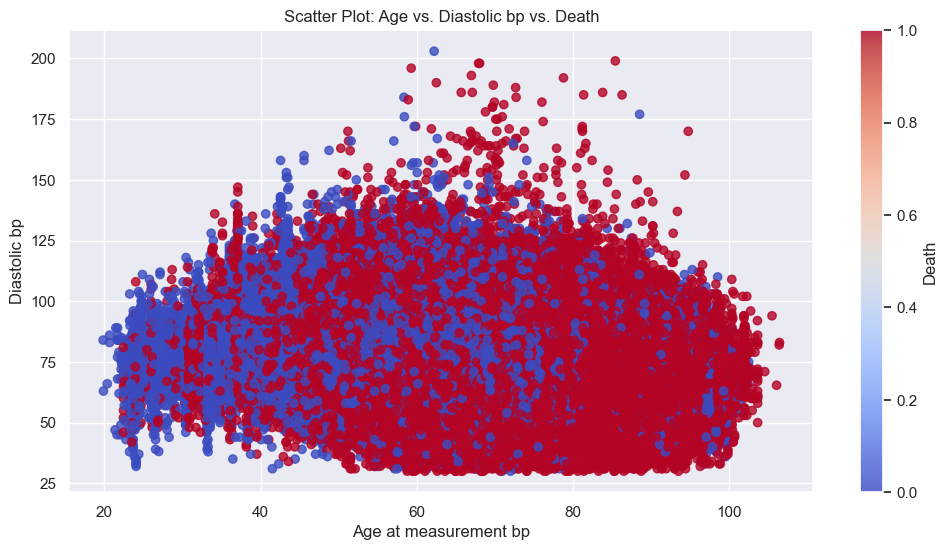

In [70]:
# Extract the required columns
age = merge_df_death['Age at measurement bp']
diastolic_bp = merge_df_death['Diastolic bp']
death = merge_df_death['death']

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(age, diastolic_bp, c=death, cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Death')
plt.xlabel('Age at measurement bp')
plt.ylabel('Diastolic bp')
plt.title('Scatter Plot: Age vs. Diastolic bp vs. Death')

plt.show()

- Age above 70 is strongly associated with a higher risk of death. A significant number of individuals above 70 years old are represented by data points colored dark, indicating a higher likelihood of mortality. 

- Around 90% of individuals above 70 years old with high diastolic blood pressure experienced death, as indicated by the predominant dark color among those data points. 

### Age vs. Systolic bp vs. Death

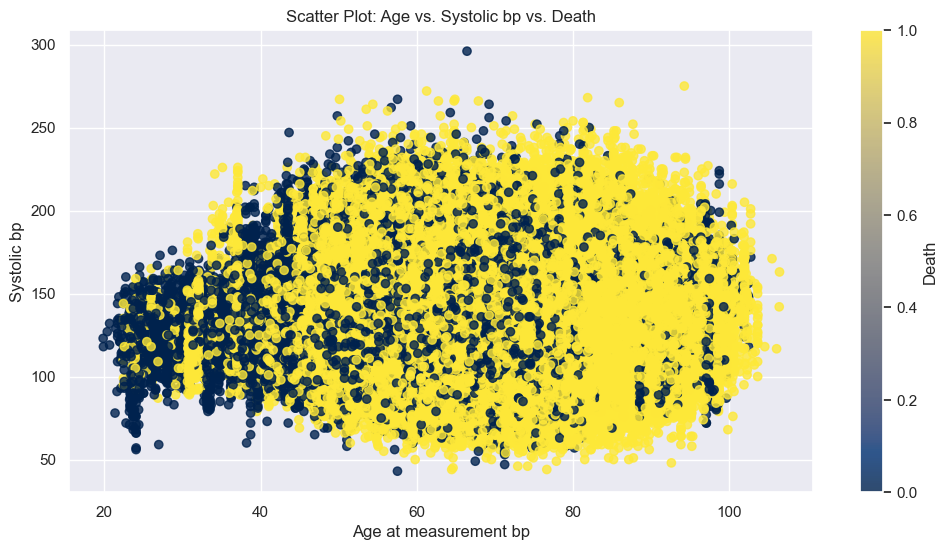

In [71]:
# Extract the required columns
age = merge_df_death['Age at measurement bp']
systolic_bp = merge_df_death['Systolic bp']
death = merge_df_death['death']

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(age, systolic_bp, c=death, cmap='cividis', alpha=0.8)
plt.colorbar(label='Death')
plt.xlabel('Age at measurement bp')
plt.ylabel('Systolic bp')
plt.title('Scatter Plot: Age vs. Systolic bp vs. Death')

plt.show()

- Similarly, for systolic blood pressure (SBP), we observe that after the age of 80, there is a notable association with a higher risk of death. Among individuals above 80 years old, there is a prominent cluster of data points colored dark, indicating a higher likelihood of mortality.
- In particular, there is a significant number of death cases among individuals with SBP below 70 and above 200.

---

### Observations:


### 1. **Data type:**
- The 'Internalpatientid' column contains integer values, and the columns for 'Age at measurement bp', 'Diastolic bp' and 'Systolic bp' are in float format, while the rest of the features are in object format.

**Shape of the data**
- Number of rows: 522740
- Number of columns: 17
- Number of Unique Patientid: 7965

---     

### 2. **Missing Values:**
- There is no missing value in this measurement bp file.
---     

### 3. **Numerical Data Analysis:** 

**Age at measurement bp:**

**Age at admission:**
- Count: 522740
- Mean age: 69.18
- Minimum Age: 20.40
- Maximum ge: 109.22

- Outlier age range: There are two ranges of outlier ages in the dataset. One range is between 20 and 40, and the other range is between 100 and 107.

**Diastolic bp:**
- Count: 522740
- Mean diastolic bp: 72.55
- Minimum diastolic bp: 30.00
- Maximum diastolic bp: 203.00
- **No. Patient's Diastolic BP Below 80 and above 80**
     - Count above 80:  270730
     - Count below 80:  751919
- Outlier age range: There are outliers for systolic blood pressure in the ranges of 43 to 71 and 191 to 293, indicating potentially dangerous health issues.

**Systolic bp:**
- Count: 522740
- Mean systolic bp: 131.89
- Minimum systolic bp: 43.00
- Maximum systolic bp: 296.00
- **No. Patient's Systolic BP Below 120 and above 120**
    - Count above 120:  710646
    - Count below 120:  320455
- Outlier age range: There are outliers for systolic blood pressure in the ranges of 43 to 71 and 191 to 293, indicating potentially dangerous health issues.
- Systolic BP Below 120 and above 120: 393

---

### 4. **Analyze the relationship between the features**

**Scatterplot**

**Age at measurement bp vs Diastolic bp**
- There appears to be a wide range of Diastolic bp values across different age groups. The Diastolic bp values vary for similar Age at measurement bp values, indicating that factors other than age may influence Diastolic bp.

- There are some outliers in the data, particularly in the higher Diastolic bp range at the age 60-90. These outliers represent individuals with significantly higher Diastolic bp compared to the majority of the data points.

**Age at measurement bp vs Systolic bp**
- There is a wide range of Systolic bp values across different age groups. The Systolic bp values vary considerably for similar Age at measurement bp values, indicating that factors other than age may contribute to variations in Systolic bp.
- The number of patients in the age range of 20 to 40 is relatively lower compared to other age ranges in the dataset.


**Age vs. Diastolic bp vs. Death**
- Age above 70 is strongly associated with a higher risk of death. A significant number of individuals above 70 years old are represented by data points colored dark, indicating a higher likelihood of mortality. 

- Around 90% of individuals above 70 years old with high diastolic blood pressure experienced death, as indicated by the predominant dark color among those data points. 

**Age vs. Systolic bp vs. Death**
- Similarly, for systolic blood pressure (SBP), we observe that after the age of 80, there is a notable association with a higher risk of death. Among individuals above 80 years old, there is a prominent cluster of data points colored dark, indicating a higher likelihood of mortality.
- In particular, there is a significant number of death cases among individuals with SBP below 70 and above 200.

--- 

### Object Data Analysis: 
**State:** 
- There are a total of 1048575 measurements recorded. These measurements are distributed across 50 unique states. 
- Among all the states, Texas has the highest frequency, appearing 98710 times in the dataset.

**Note: Bucketing has been done for this dataset for these columns “Age-based on Diastolic bp and Systolic bp”**

